<div>
Olá, Mateus!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v1</b> <a class="tocSkip"></a>
<s>
Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado 
- Comentários sucintos e bem objetivos
- Conclusões pertinentes em cada análise e etapa de avaliação
- Uso adequado de gráficos
 
<br>
    
Entretanto, deixei alguns comentários em alguns trechos que precisam de ajuste. Peço que trabalhe nesses pontos para avançarmos.
    
<br>
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**
</s>
</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor v2</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão do seu trabalho ficou muito melhor! Espero que as sugestões sejam relevantes para projetos futuros.
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
    
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>

# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

<span style="color: blue;">
O propósito do projeto é conhecer qual plano gera maior receita. Para isso, vamos avaliar o quanto foi consumido por cada usuário e em cada mês. Na sequência vamos avaliar qual era a cota de consumo incluída e fazer os cálculos considerando o consumo excedente que deve ser cobrado. Por último, utilizando os dados de receita, faremos testes estatísticos para determinar qual plano gera a maior receita.
</span>

## Inicialização

In [1]:
# Carregando todas as bibliotecas
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib.patches import Patch


## Carregue os dados

In [2]:
# Carregue os arquivos de dados em diferentes DataFrames

calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- Os conjuntos de dados foram carregados corretamente
- O import das bibliotecas foi feito de forma correta e em uma célula separada.
</div>

## Prepare os dados

[Os dados deste projeto estão divididos em várias tabelas. Explore cada uma para obter uma compreensão inicial dos dados. Faça correções em cada tabela, se necessário.]

# Planos

In [3]:
# Imprima informações gerais/resumo sobre o DataFrame dos planos

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprima uma amostra de dados dos planos

print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


<span style="color: blue;">    
Podemos alterar o formato dos dados que contém preços para o tipo float.
Os demais dados estão coerentes.

## Corrija os dados

<span style="color: blue;">
Podemos alterar os formatos dos dados de preços para float
   
</span>

In [5]:
# Corrigindo o formato dos dados nas duas colunas
plans['usd_monthly_pay'] = plans['usd_monthly_pay'].astype('float')
plans['usd_per_gb'] = plans['usd_per_gb'].astype('float')

# Visualizando as alterações
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(4), int64(3), object(1)
memory usage: 256.0+ bytes


## Enriqueça os dados

<span style="color: blue;">
Podemos criar uma nova coluna com a quantidade de internet em Gb
   
</span>

In [6]:
# Criando a nova coluna
plans['gb_per_month_included'] = plans['mb_per_month_included']/1024.0

# confirmando alterações
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(5), int64(3), object(1)
memory usage: 272.0+ bytes


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O método `info()` foi utilizado para estudo inicial do conjunto de dados
- Os campos foram convertidos para os tipos adequados
- Aqui você poderia criar novos atributos a partir dos dados existentes. Se você acredita que não seja necessário a criação de nenhum atributo novo, adicione suas observações afirmando que não há a necessidade dessa etapa **para esse dataframe**
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>

- A informação de 'mb_per_month_included' poderia ser alterada aqui para Gb, mas optei por fazer isso mais abaixo durante o processamento dos dados.
</div>


# Usuários

In [7]:
# Imprima informações gerais/resumo sobre o DataFrame dos usuários

users.info()
print()
print(users.duplicated().sum(), 'duplicados')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

0 duplicados


In [8]:
# Imprima uma amostra de dados dos usuários

print(users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


<span style="color: blue;">
    
- Não há dados duplicados.
    
- A coluna 'plan' pode ter o nome alterado para 'plan_name' para compatibilizar com o dataframe anterior (plans).
</span>
    
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>

Os dados de 'reg_date' poderiam ser alterados para o tipo datetime, mas eles não parecem ser necessários na análise, assim não realizei nenhuma alteração.
</div>

## Corrija os dados

<span style="color: blue;">
    
Compatibilizando o nome da coluna plan_name
</span>

In [9]:
# Alterando o nome da coluna para compatibilizar entre dataframes
users = users.rename(columns={'plan':'plan_name'})

# Visualizando as alterações
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan_name   500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- <s>[x] O método `info()` foi utilizado para estudo inicial do conjunto de dados</s>
- <s>[x] O método `head()` foi utilizado para exibir uma amostra dos dados</s>
- <s>[x] Os campos foram convertidos para os tipos adequados</s>
- <s>[x] Aqui não é adequado preencher o campo `churn_date` com algum valor, pois irá distorcer os dados com valores fictícios. Além disso, você está criando uma coluna com valores mistos: `date` e `str/object`. Aqui o ideal é deixar como `nan` mesmo, pois a ausência de valores para esse atributo é uma informação relevante. Para enriquecer os dados, você poderia criar uma outra coluna indicativa a partir da `churn_date` ("booleana") se o usuário cancelou o está ativo.</s>
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>

- Entendido. Correções realizadas
</div>

# Chamadas

In [10]:
# Imprima informações gerais/resumo sobre o DataFrame das chamadas

calls.info()
print()
print(calls.duplicated().sum(), 'duplicados')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

0 duplicados


In [11]:
# Imprima uma amostra de dados das chamadas

print(calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


<span style="color: blue;">
    
Não há dados ausentes nem duplicados.


## Corrija os dados

<span style="color: blue;">
    
Podemos alterar a coluna call_date para o formato datetime.
    
</span>





In [12]:
# Alterando o formato da coluna call_date
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

# Confirmando as alterações
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>Aqui você precisa corrigir o atributo do tipo `date` (veja no método `info()` acima que está como `object`)</s>
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>

Corrigido.
</div>

## Enriqueça os dados

<span style="color: blue;">
    
- Podemos criar uma coluna nova com o arredondamento da duração conforme diretrizes da companhia (chamadas arredondadas para cima. Mesmo que tenha durado um segundo, um minuto será contado)
    
- Podemos criar uma coluna nova com o mês das chamadas. 
    
</span>

In [13]:
# Criando nova coluna com a duração arredondada
calls['duration_ceil'] = calls['duration'].apply(np.ceil)

# Criando uma nova coluna de mês
calls['month'] = calls['call_date'].dt.month

# Confirmando as alterações
calls.info()
print()
print(calls.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             137735 non-null  object        
 1   user_id        137735 non-null  int64         
 2   call_date      137735 non-null  datetime64[ns]
 3   duration       137735 non-null  float64       
 4   duration_ceil  137735 non-null  float64       
 5   month          137735 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 6.3+ MB

         id  user_id  call_date  duration  duration_ceil  month
0   1000_93     1000 2018-12-27      8.52            9.0     12
1  1000_145     1000 2018-12-27     13.66           14.0     12
2  1000_247     1000 2018-12-27     14.48           15.0     12
3  1000_309     1000 2018-12-28      5.76            6.0     12
4  1000_380     1000 2018-12-30      4.22            5.0     12


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O método `info()` foi utilizado para estudo inicial do conjunto de dados
- Os dados foram enriquecidos
</div>

# Mensagens

In [14]:
# Imprima informações gerais/resumo sobre o DataFrame das mensagens

messages.info()
print()
print(messages.duplicated().sum(), 'duplicados')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

0 duplicados


In [15]:
# Imprima uma amostra dos dados das mensagens

print(messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


## Corrija os dados

<span style="color: blue;">
    
Podemos alterar a coluna 'message_date' para o formato datetime.
    
</span>

In [16]:
# Alterando o formato da coluna message_date
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>Aqui você precisa corrigir o atributo do tipo `date` (veja no método `info()` acima que está como `object`)</s>
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>

Corrigido.
</div>

## Enriqueça os dados

<span style="color: blue;">
Podemos criar uma coluna nova com o mês das chamadas.
    
</span>

In [17]:
# Criando uma nova coluna de mês
messages['month'] = messages['message_date'].dt.month

# Confirmando as alterações
messages.info()
print()
print(messages.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB

         id  user_id message_date  month
0  1000_125     1000   2018-12-27     12
1  1000_160     1000   2018-12-31     12
2  1000_223     1000   2018-12-31     12
3  1000_251     1000   2018-12-27     12
4  1000_255     1000   2018-12-26     12


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O método `info()` foi utilizado para estudo inicial do conjunto de dados
- Os dados foram enriquecidos
</div>

# Internet

In [18]:
# Imprima informações gerais/resumo sobre o DataFrame da internet

internet.info()
print()
print(internet.duplicated().sum(), 'duplicados')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

0 duplicados


In [19]:
#  Imprima uma amostra de dados para o tráfego da internet

print(internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


## Corrija os dados

<span style="color: blue;">

Podemos alterar a coluna session_date para o formato datetime.

</span>

In [20]:
# Alterando o formato da coluna 'session_date'
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>O atributo `session_date` precisa ser corrigido nessa seção (você fez a conversão logo abaixo)</s>
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>

Corrigido
</div>

## Enriqueça os dados

<span style="color: blue;">
    
- Podemos criar uma coluna nova com o mês das sessions.
    
- Podemos criar uma coluna com a quantidade de dados em Gb.
    
</span>

In [21]:
# Criando uma nova coluna de mês
internet['month'] = internet['session_date'].dt.month

# Criando uma nova coluna com internet em Gb
internet['gb_used'] = internet['mb_used']/1024.0

# Confirmando as alterações
print(internet.head())
print()
internet.info()


         id  user_id session_date  mb_used  month   gb_used
0   1000_13     1000   2018-12-29    89.86     12  0.087754
1  1000_204     1000   2018-12-31     0.00     12  0.000000
2  1000_379     1000   2018-12-28   660.40     12  0.644922
3  1000_413     1000   2018-12-26   270.99     12  0.264639
4  1000_442     1000   2018-12-27   880.22     12  0.859590

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
 5   gb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 4.8+ MB


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O método `info()` foi utilizado para estudo inicial do conjunto de dados
- Os dados foram enriquecidos
</div>

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Aqui você poderia ter convertido o consumo de internet para `gb`. O ideal é fazer essas transformações de dados nessa seção, pois é aqui que você lida com transformações de dados. Lembre-se que é uma boa prática manter uma ordem lógica nas etapas do seu projeto.
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>

Corrigido
</div>

# Estude as condições dos planos

In [22]:
# Imprima as condições dos planos e certifique-se de que elas fazem sentido para você

print(plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0             20.0        10.0             0.03            0.03      surf   
1             70.0         7.0             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  


# Agregue os dados por usuário


<span style="color: blue;">
    
- Vamos reunir em um único dataframe todos os dados dos outros dataframes, para que assim conste em cada linha: usuário, mês, e as quantidades consumidas naquele mês por aquele usuário (quantidade de chamadas, soma de minutos, soma de mensagens e soma de dados).
    
- Depois adicionamos as informações do plano de cada usuário, onde consta a cota incluída no plano referente a minutos, chamadas e dados.
    
- Por últimos, calculamos quanto cada usuário usou além da cota incluída, tanto em quantidades (minutos, mensagens e dados) como em valor a ser cobrado pelos extras. Ao final temos uma somatória do valor a ser cobrado de cada usuário em cada mês.
    
- Observar as regras de cobranças do companhia para minutos e internet. Os dados devem ser manipulados de forma que a cobrança seja feita corretamente segundo as diretrizes da empresa.

In [23]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

# Agrupando a por user_id e month
calls_count = calls.groupby(['user_id','month'])['id'].count().reset_index(name='calls_count')

# Imprimindo
print(calls_count)
print()
print(calls_count[calls_count['calls_count'].isna()])


      user_id  month  calls_count
0        1000     12           16
1        1001      8           27
2        1001      9           49
3        1001     10           65
4        1001     11           64
...       ...    ...          ...
2253     1498     12           39
2254     1499      9           41
2255     1499     10           53
2256     1499     11           45
2257     1499     12           65

[2258 rows x 3 columns]

Empty DataFrame
Columns: [user_id, month, calls_count]
Index: []


In [24]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

# Agrupando a por user_id e month
min_sum = calls.groupby(['user_id','month'])['duration_ceil'].sum().reset_index(name='min_used')

# Imprimindo
print(min_sum)

      user_id  month  min_used
0        1000     12     124.0
1        1001      8     182.0
2        1001      9     315.0
3        1001     10     393.0
4        1001     11     426.0
...       ...    ...       ...
2253     1498     12     339.0
2254     1499      9     346.0
2255     1499     10     385.0
2256     1499     11     308.0
2257     1499     12     496.0

[2258 rows x 3 columns]


In [25]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.

# Agrupando por user_id e month
msg_count = messages.groupby(['user_id','month'])['id'].count().reset_index(name='msg_used')

# Imprimindo
print(msg_count)

      user_id  month  msg_used
0        1000     12        11
1        1001      8        30
2        1001      9        44
3        1001     10        53
4        1001     11        36
...       ...    ...       ...
1801     1496      9        21
1802     1496     10        18
1803     1496     11        13
1804     1496     12        11
1805     1497     12        50

[1806 rows x 3 columns]


In [26]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

# Agrupando a por user_id e month
internet_sum = internet.groupby(['user_id','month'])['gb_used'].sum().reset_index(name='data_used')

# Arredondando para cima
internet_sum['data_used'] = internet_sum['data_used'].apply(np.ceil)

# Imprimindo
print(internet_sum)

      user_id  month  data_used
0        1000     12        2.0
1        1001      8        7.0
2        1001      9       14.0
3        1001     10       22.0
4        1001     11       19.0
...       ...    ...        ...
2272     1498     12       23.0
2273     1499      9       13.0
2274     1499     10       20.0
2275     1499     11       17.0
2276     1499     12       22.0

[2277 rows x 3 columns]


In [27]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month

# Criando um dataframe com todos os consumos de cada usuário

# Fundindo o segundo dataframe ao primeiro
users_cons = calls_count.merge(min_sum, on=['user_id','month'], how='outer')

# Fundindo o terceiro dataframe
users_cons = users_cons.merge(msg_count, on=['user_id','month'], how='outer')

# Fundindo o quarto dataframe
users_cons = users_cons.merge(internet_sum, on=['user_id','month'], how='outer')

# Substituindo todos NaNs por zero
users_cons.fillna(0, inplace=True)

print(users_cons.head())



   user_id  month  calls_count  min_used  msg_used  data_used
0     1000     12         16.0     124.0      11.0        2.0
1     1001      8         27.0     182.0      30.0        7.0
2     1001      9         49.0     315.0      44.0       14.0
3     1001     10         65.0     393.0      53.0       22.0
4     1001     11         64.0     426.0      36.0       19.0


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Bom trabalho fazendo o join usando `outer`. Aqui é essencial fazer o join dessa forma para evitar filtrar registros dos usuários
</div>

In [28]:
# Adicione as informações sobre o plano

# Criando um dataframe filtrado com apenas 'user_id' e 'plan'
users_plans = users[['user_id', 'plan_name', 'city']]

# Fundindo com o dataframe de consumo
users_cons = users_cons.merge(users_plans, on='user_id', how='left')

# Fundindo com o dataframe plans para obter os dados dos planos em cada linha
users_cons = users_cons.merge(plans, on='plan_name', how='left')

users_cons.info()
print()

print(users_cons)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   month                  2293 non-null   int64  
 2   calls_count            2293 non-null   float64
 3   min_used               2293 non-null   float64
 4   msg_used               2293 non-null   float64
 5   data_used              2293 non-null   float64
 6   plan_name              2293 non-null   object 
 7   city                   2293 non-null   object 
 8   messages_included      2293 non-null   int64  
 9   mb_per_month_included  2293 non-null   int64  
 10  minutes_included       2293 non-null   int64  
 11  usd_monthly_pay        2293 non-null   float64
 12  usd_per_gb             2293 non-null   float64
 13  usd_per_message        2293 non-null   float64
 14  usd_per_minute         2293 non-null   float64
 15  gb_p

In [44]:
# Calcule a receita mensal para cada usuário

# Definindo uma função para cálculo da receita
def calc_revenue(row):

    # valor mensal
    total_charge = row['usd_monthly_pay'] 

    # minutos extras
    if row['min_used'] > row['minutes_included']:
        total_charge = total_charge + (row['min_used'] - row['minutes_included']) * row['usd_per_minute']

    # mensagens extras
    if row['msg_used'] > row['messages_included']:
        total_charge = total_charge + (row['msg_used'] - row['messages_included']) * row['usd_per_message']

    # internet extra
    if row['data_used'] > row['gb_per_month_included']:
        total_charge = total_charge + (row['data_used'] - row['gb_per_month_included']) * row['usd_per_gb']

    return total_charge

# Chamando a função e criando uma nova coluna

users_cons['total_charge'] = users_cons.apply(calc_revenue, axis=1)

# Visualizando o resultado final 
print(users_cons)
print()
users_cons.info()

      user_id  month  calls_count  min_used  msg_used  data_used plan_name  \
0        1000     12         16.0     124.0      11.0        2.0  ultimate   
1        1001      8         27.0     182.0      30.0        7.0      surf   
2        1001      9         49.0     315.0      44.0       14.0      surf   
3        1001     10         65.0     393.0      53.0       22.0      surf   
4        1001     11         64.0     426.0      36.0       19.0      surf   
...       ...    ...          ...       ...       ...        ...       ...   
2288     1349     12          0.0       0.0      61.0       13.0      surf   
2289     1361      5          0.0       0.0       2.0        2.0      surf   
2290     1482     10          0.0       0.0       2.0        0.0  ultimate   
2291     1108     12          0.0       0.0       0.0        1.0  ultimate   
2292     1311      6          0.0       0.0       0.0        2.0  ultimate   

                                           city  messages_inclu

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
O cálculo de receita foi realizado corretamente. Como sugestão, você poderia organizar o código acima usando uma função (`calculate_revenue(..)`, por exemplo)
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>

Corrigido
</div>

# Estude o comportamento do usuário

[Calcule algumas estatísticas descritivas úteis para os dados agregados, o que costuma revelar uma imagem geral capturada pelos dados. Desenhe gráficos úteis para ajudar na compreensão. Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.]

[Existem dicas relevantes nos comentários para as chamadas. Essas dicas não foram fornecidas para as mensagens e internet, mas o princípio do estudo estatístico é o mesmo em todos os casos.]

## Chamadas

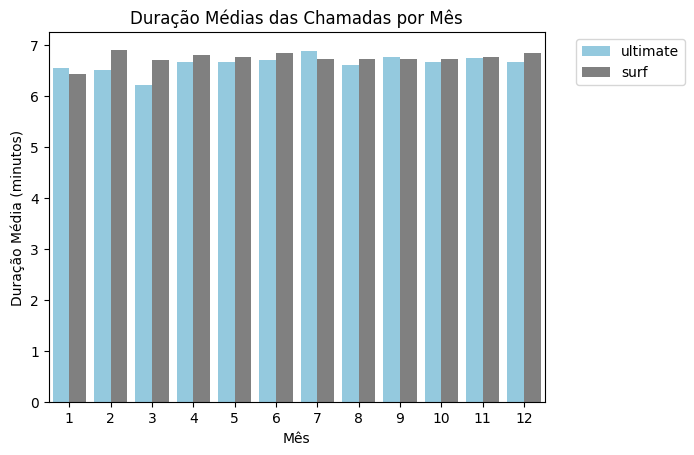

In [45]:
# Compare a duração média das chamadas de cada plano para cada mês. Crie um gráfico de barras para visualizar o resultado.

# Criando um novo dataframe com calls + o nome do plano 
calls_and_plans = calls.merge(users_plans, on='user_id', how='left')

# Definindo uma paleta de cores fixa para os gráficos
custom_palette = {
    'surf': 'grey',
    'ultimate': 'skyblue'
}

# Criando um gráfico de barras
ax = sns.barplot(data=calls_and_plans,
            x='month',
            y='duration',
            hue='plan_name',
            palette=custom_palette,
            ci=None
           );

# Definindo nomes dos eixos e título
ax.set_xlabel('Mês')
ax.set_ylabel('Duração Média (minutos)')
ax.set_title('Duração Médias das Chamadas por Mês')

# Posicionando a legenda fora do gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

<span style="color: blue;">
    
- Visualmente, a duração média das chamadas em ambos os planos é parecida tanto comparando entre os planos como comparando mês a mês.

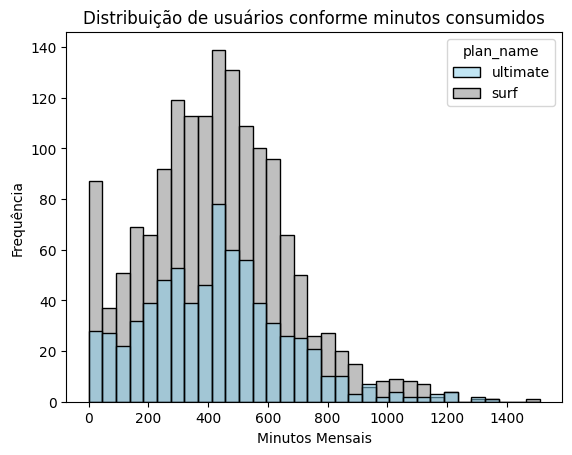

In [46]:
# Compare o número de minutos que os usuários de cada plano necessitam a cada mês. Construa um histograma.

# Criando um histograma
ax = sns.histplot(data=users_cons,
                  x='min_used',
                  hue='plan_name',
                  palette=custom_palette
                 );

# Definindo nomes dos eixos e título
ax.set_xlabel('Minutos Mensais');
ax.set_ylabel('Frequência');
ax.set_title('Distribuição de usuários conforme minutos consumidos');

<span style="color: blue;">
    
- Em ambos os planos, a faixa de 450 a 550 minutos mensais é a que mostra o maior número de ocorrências.

[Calcule a média e a variância da duração das chamadas para refletir se os usuários de cada plano possuem comportamentos diferentes sobre as chamadas.]

In [62]:
# Calcule a média e a variância da duração mensal das chamadas
duration_agg = users_cons.groupby(['plan_name','month'])['min_used'].agg({'mean','var', 'std'})
print(duration_agg)

                          var         std        mean
plan_name month                                      
surf      1      15842.000000  125.865007  203.000000
          2      52226.500000  228.531179  297.000000
          3      35809.363636  189.233622  330.000000
          4      50866.743265  225.536567  351.540000
          5      59754.219754  244.446763  399.584416
          6      45592.628436  213.524304  431.298969
          7      61005.099725  246.992105  449.983471
          8      54344.645963  233.119381  410.111111
          9      46595.958656  215.860971  414.226804
          10     52278.664056  228.645280  429.729958
          11     51607.021602  227.171789  423.325088
          12     63629.518918  252.248923  473.836478
ultimate  1      16572.333333  128.733575  193.500000
          2      76889.476190  277.289517  403.142857
          3      61984.931818  248.967732  304.250000
          4      34888.928571  186.785783  336.857143
          5      43841.04679

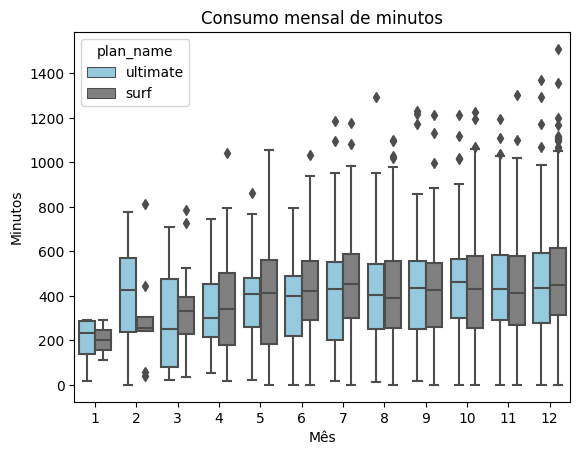

In [48]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas

# Criando um boxplot com os dados de médias mensais de duração de chamadas
sns.boxplot(data=users_cons,
            y='min_used',
            x='month',
            hue='plan_name',
            palette=custom_palette);

# Adicionando o título e rótulo do eixo x
plt.title('Consumo mensal de minutos')
plt.xlabel('Mês')
plt.ylabel('Minutos')

# Exibindo o gráfico
plt.show()

[Formule conclusões sobre como os usuários se comportam em termos de chamadas. O comportamento é diferente dependendo do plano?]

<span style="color: blue;">
    
- Os usuários parecem se comportar de forma diferente em cada plano.
    
- As distribuições parecem variar bastante mês a mês. Avaliando o IQR de cada distribuição: 
    
    - vemos que em fevereiro o consumo de minutos dos usuários do Surf tem um box/IQR (Intervalo Inter Quartil) bem menor que os demais meses;
    
    - já os usuários do Ultimate, a distribuição de março mostra um IQR bastante amplo;
    
    - ambos os planos em janeiro tiveram IQR bastante reduzido, se comparados com as distribuições dos meses de março em diante;
    
- Precisamos de mais informações para poder afirmar se a diferença observada nos dados é estatisticamente relevante.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- A duração média das chamadas foi comparada entre os planos
- As distribuições foram analisadas. Bom trabalho com os gráficos acima!
- Estatísticas descritivas foram calculadas: média e variância. Dica: poderia ter calculado o desvio padrão
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>

Corrigido
</div>

## Mensagens

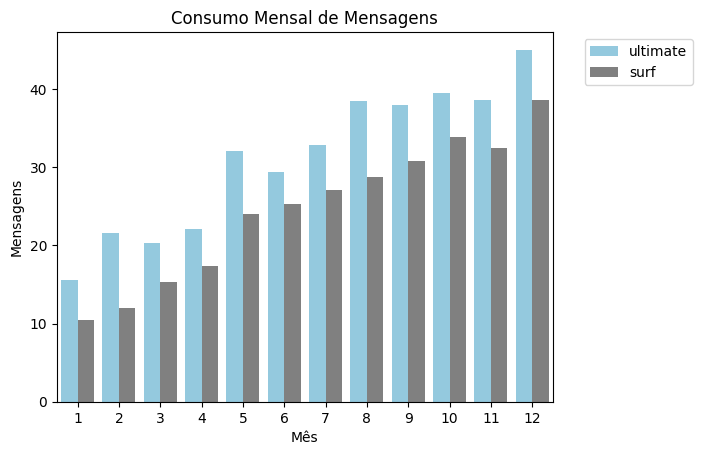

In [49]:
# Compare o número de mensagens que os usuários de cada plano costumam enviar a cada mês

# Criando um gráfico de barras
ax = sns.barplot(data=users_cons,
            x='month',
            y='msg_used',
            hue='plan_name',
            palette=custom_palette,
            ci=None
           );

# Definindo nomes dos eixos e título
ax.set_xlabel('Mês')
ax.set_ylabel('Mensagens')
ax.set_title('Consumo Mensal de Mensagens')

# Posicionando a legenda fora do gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

In [63]:
# Calcule a média e a variância da duração mensal das chamadas
msg_agg = users_cons.groupby(['plan_name','month'])['msg_used'].agg({'mean','var', 'std'})
print(msg_agg)

                         var        std       mean
plan_name month                                   
surf      1       220.500000  14.849242  10.500000
          2       386.000000  19.646883  12.000000
          3       346.565217  18.616262  15.260870
          4       501.591837  22.396246  17.400000
          5       847.197198  29.106652  24.012987
          6       914.920103  30.247646  25.298969
          7       923.915565  30.395979  27.033058
          8      1029.515528  32.086064  28.777778
          9      1003.829496  31.683268  30.762887
          10     1275.465708  35.713663  33.839662
          11     1065.344034  32.639608  32.385159
          12     1458.158612  38.185843  38.600629
ultimate  1       313.666667  17.710637  15.500000
          2       478.285714  21.869744  21.571429
          3       654.386364  25.580977  20.250000
          4       544.147619  23.326972  22.047619
          5      1297.310345  36.018195  32.103448
          6       857.620722  2

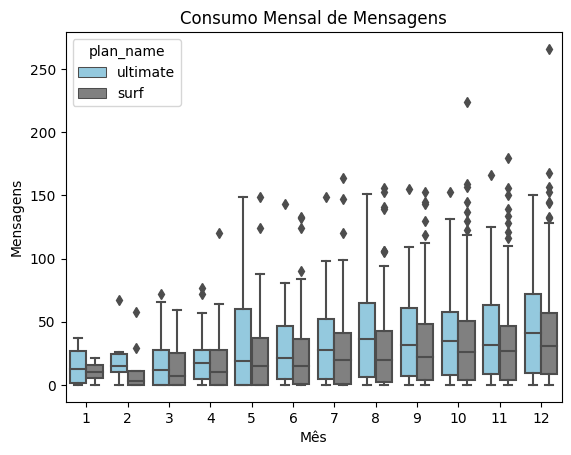

In [51]:
# Criando um boxplot para as médias mensais de mensagens 

# Criando o boxplot
sns.boxplot(data=users_cons,
            y='msg_used',
            x='month',
            hue='plan_name',
            palette=custom_palette
           );

# Adicionando o título e rótulo do eixo x
plt.title('Consumo Mensal de Mensagens');
plt.xlabel('Mês');
plt.ylabel('Mensagens');


[Formule conclusões sobre como os usuários costumam consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]

<span style="color: blue;">
    
- Nota-se que as quantidades de mensagens usadas parecem se comportar diferentemente entre os planos.
    
- Do gráfico de consumo médio, vemos uma tendência de alta, onde, para ambos os planos, o consumo foi baixo em janeiro e cresceu gradativamente ao longo do ano, até chegar em seus valores máximos em dezembro.
    
- Fevereiro foi um mês em que a amplitude do IQR foi baixa em ambos os planos, indicando uma menor variação em relação aos demais meses.
    
- Janeiro também foi um mês de baixo IQR para o plano Surf.
    
- Vemos que, de forma geral, no segundo semestre o consumo foi maior em ambos os planos, mostrando outliers em regiões mais altas do que nos primeiro semestre.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O consumo de quantidade de mensagens foi comparado entre os planos
- As distribuições foram analisadas
- Estatísticas descritivas foram calculadas: média e variância. Dica: poderia ter calculado o desvio padrão
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>

Corrigido
</div>

## Internet

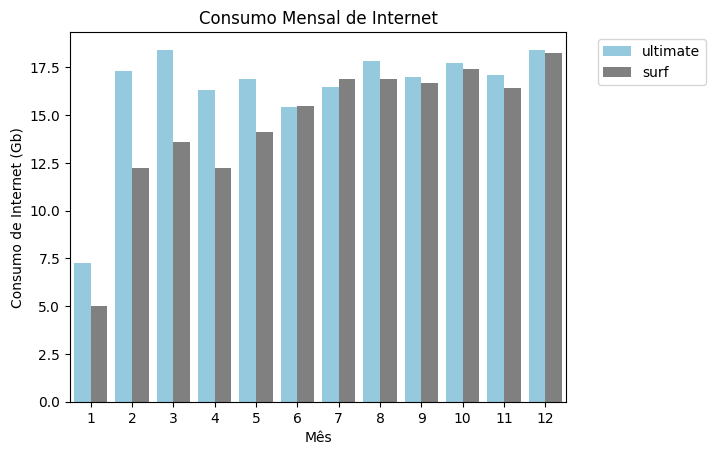

In [52]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano

# Criando um gráfico de barras
ax = sns.barplot(data=users_cons,
            x='month',
            y='data_used',
            hue='plan_name',
            palette=custom_palette,
            ci=None
           );

# Definindo nomes dos eixos e título
ax.set_xlabel('Mês')
ax.set_ylabel('Consumo de Internet (Gb)')
ax.set_title('Consumo Mensal de Internet')

# Posicionando a legenda fora do gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

In [64]:
# Calculando variância e média

data_agg = users_cons.groupby(['plan_name','month'])['data_used'].agg({'mean','var','std'})
print(data_agg)


                        var        std       mean
plan_name month                                  
surf      1       18.000000   4.242641   5.000000
          2       41.444444   6.437736  12.222222
          3       63.984190   7.999012  13.565217
          4       56.215918   7.497728  12.220000
          5       58.183527   7.627813  14.116883
          6       47.752363   6.910308  15.484536
          7       61.476171   7.840674  16.876033
          8       71.420942   8.451091  16.882716
          9       49.240639   7.017167  16.690722
          10      60.725846   7.792679  17.409283
          11      54.607824   7.389711  16.431095
          12      69.210841   8.319305  18.238994
ultimate  1       14.916667   3.862210   7.250000
          2       37.904762   6.156684  17.285714
          3      138.628788  11.774073  18.416667
          4       85.833333   9.264628  16.333333
          5       54.194581   7.361697  16.862069
          6       68.858464   8.298100  15.425532


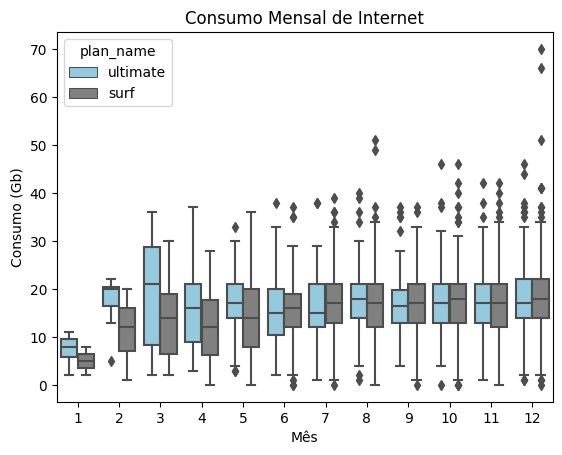

In [54]:
# Criando um boxplot para as médias mensais de internet 

# Criando o boxplot
sns.boxplot(data=users_cons,
            y='data_used',
            x='month',
            hue='plan_name',
            palette=custom_palette
           );

# Adicionando o título e rótulo do eixo x
plt.title('Consumo Mensal de Internet');
plt.xlabel('Mês');
plt.ylabel('Consumo (Gb)');


[Formule conclusões sobre como os usuários tendem a consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]


<span style="color: blue;">
    
- Nota-se que as quantidades médias de internet consumida parecem se comportar diferentemente entre os planos e varia ao longo dos meses.
    
- Em janeiro, ambos planos tiveram um consumo relativamente baixo.
    
- Os usuários do plano Surf parecem consumir mais internet no segundo semestre do que no primeiro. No primeiro semestre, o consumo deles parece ter seguido uma tendência de alta até a metade do ano. O IQR registrado nos meses de março, abril e maio foram os maiores nesse plano em relação ao resto do ano. O IQR em janeiro foi significativamente menor do que nos demais meses.
    
- Os usuários do Ultimate consumiram menos internet no mês de janeiro do que nos demais meses. De fevereiro em diante, a média oscilou dentro de uma faixa relativamente estável, entre 15Gb e 17Gb. As distribuições mostram um IQR baixo nos meses de janeiro e fevereiro, e bastante alto no mês de março.
    
- De forma geral, a presença de outliers foi mais frequênte nos meses do segundo semestre, para ambos os planos.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O consumo de internet em `gb` foi comparado entre os planos
- As distribuições foram analisadas
- Estatísticas descritivas foram calculadas: média e variância. Dica: poderia ter calculado o desvio padrão
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>

Corrigido
</div>

## Receita

[Da mesma forma que você estudou o comportamento dos usuários, descreva estatisticamente as receitas dos planos.]

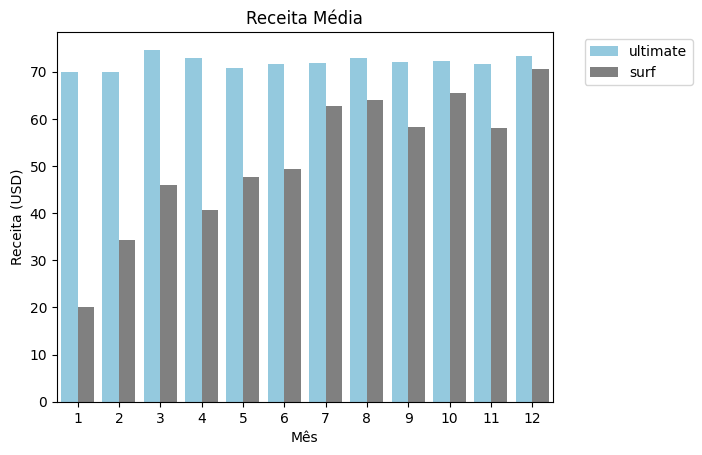

In [55]:
# Avaliando a receida de cada plano, em cada mês

# Criando um gráfico de barras
ax = sns.barplot(data=users_cons,
            x='month',
            y='total_charge',
            hue='plan_name',
            palette=custom_palette,
            ci=None
           );

# Definindo nomes dos eixos e título
ax.set_xlabel('Mês')
ax.set_ylabel('Receita (USD)')
ax.set_title('Receita Média')

# Posicionando a legenda fora do gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

In [65]:
# Calcule a média e a variância da receita mensal média
data_agg = users_cons.groupby(['plan_name','month'])['total_charge'].agg({'mean','var','std'})
print(data_agg)

                         var        std       mean
plan_name month                                   
surf      1         0.000000   0.000000  20.000000
          2       428.276100  20.694833  34.396667
          3      1512.023512  38.884747  45.941304
          4      1198.958402  34.625979  40.710600
          5      1967.540055  44.356962  47.628182
          6      1988.914046  44.597243  49.276289
          7      2943.388409  54.253004  62.674050
          8      3587.494901  59.895700  63.931173
          9      2260.644980  47.546240  58.271495
          10     3198.242612  56.553007  65.421224
          11     2494.182230  49.941788  58.004276
          12     4604.410868  67.855809  70.557044
ultimate  1         0.000000   0.000000  70.000000
          2         0.000000   0.000000  70.000000
          3       145.515152  12.062966  74.666667
          4       120.400000  10.972693  73.000000
          5        15.206897   3.899602  70.724138
          6        75.018501   

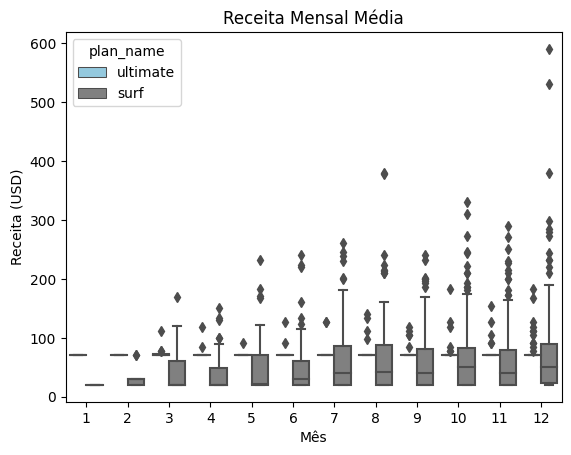

In [57]:
# Criando um boxplot para a receita mensal média

# Criando o boxplot
sns.boxplot(data=users_cons,
            y='total_charge',
            x='month',
            hue='plan_name',
            palette=custom_palette
           );

# Adicionando o título e rótulo do eixo x
plt.title('Receita Mensal Média');
plt.xlabel('Mês');
plt.ylabel('Receita (USD)');


[Formule conclusões sobre como a receita difere entre os planos.]

<span style="color: blue;">
    
- Nota-se que as quantidades médias de internet consumida parecem se comportar diferentemente entre os planos.
    
- A receita média do plano Ultimate é muito próxima de 70 USD todos os meses;
    
- A receita média do plano Surf foi próxima de 20 USD em janeiro e subiu gradativamente em uma tendência de alta, até atingir seu máximo em dezembro, mas ainda assim sendo menor do que os valores do plano Ultimate.
    
- Avaliando o boxplot, vemos que a variação das distribuições no plano Surf foi muitas vezes maior que no plano Ultimate, sendo que os boxplots do segundo plano são praticamente invisíveis (parecem ser linhas).
    
- Além disso, muitos dos outliers do plano surf, os quais pagaram os valores mais altos em cada mês, pagaram um valor frequentemente maior do que os do plano Ultimate.
    
- Estes fatores podem ser entendidos como uma tendência a que os usuários do Surf, ao ultrapassarem o limite de consumo mensal, acabam gerando uma receita maior que a maioria dos usuários.
    
- Em contrapartida, os usuários do Ultimate tendem a contribuir com pagamentos com menor variação, em uma distribuição menos dispersa.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- A receita por usuário foi comparada entre os planos
- As distribuições foram analisadas
- Estatísticas descritivas foram calculadas: média e variância. Dica: poderia ter calculado o desvio padrão
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>

Corrigido
</div>

# Teste hipóteses estatísticas

<span style="color: blue;">
    
Teste de Hipóteses:
    
- Obs: utilizaremos o valor alpha=0.05 como nível de significância estatística
    
Primeiro Teste:
    
- Hipótese nula (H₀): A receita média dos usuários dos planos Ultimate e Surf é igual.
    
- Hipótese alternativa (H₁): A receita média dos usuários dos planos Ultimate e Surf é diferente



In [58]:
# Teste as hipóteses

# Definindo as amostras
revenue_surf = users_cons[users_cons['plan_name']=='surf']['total_charge']
revenue_ultimate = users_cons[users_cons['plan_name']=='ultimate']['total_charge']

# Calculando a Variância em cada plano
print('Variância Surf:', revenue_surf.var())
print('Variância Ultimate:', revenue_ultimate.var())

Variância Surf: 3067.835152293878
Variância Ultimate: 129.8484855509195


In [59]:

# Definindo o nível crítico de significância estatística
# se o valor-p for menor que alfa, rejeitamos a hipótese nula
alpha = 0.05

# Realizando o teste adequado considerando duas amostras de dados independentes
results_test1 = st.ttest_ind(revenue_surf, revenue_ultimate, equal_var=False)

# Extraindo o valor-p
print('valor-p: ', results_test1.pvalue) 

# Comparando o valor-p com o limiar de significância estatística
if results_test1.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula.")

valor-p:  3.1703905481135734e-15
Rejeitamos a hipótese nula


<span style="color: blue;">
Segundo teste de hipóteses:
    
- Hipótese nula (H₀): A receita média dos usuários da área de NY-NJ é igual à receita média dos usuários das demais regiões.
    
- Hipótese alternativa (H₁): A receita média dos usuários da área de NY-NJ é diferente da receita média dos usuários das demais regiões.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- As hipóteses nula e alternativa foram definidas antes da execução dos testes
- O valor de alpha foi escolhido
- Os testes foram conduzidos corretamente usando o teste t
- O argumento `equal_var` foi configurado para conduzir o teste assumindo diferença nas variâncias.
</div>

In [66]:
# Obtendo lista de regiões
print(users_cons['city'].unique())

#Filtrando o dataframe

# Criando uma string com o nome completo da região "NY-NJ"
ny_nj_str = 'New York-Newark-Jersey City, NY-NJ-PA MSA'

# Dataframe filtrado apenas com consumos dessa região
users_cons_ny_nj = users_cons[users_cons['city']==ny_nj_str]['total_charge']

# Dataframe filtrado com consumos de todas regiões exceto a região NY-NJ
users_cons_ex_ny_nj = users_cons[~(users_cons['city']==ny_nj_str)]['total_charge']

print('Variância NY-NJ', users_cons_ny_nj.var())
print('Variância outras áreas', users_cons_ex_ny_nj.var())


['Atlanta-Sandy Springs-Roswell, GA MSA' 'Seattle-Tacoma-Bellevue, WA MSA'
 'Las Vegas-Henderson-Paradise, NV MSA' 'Tulsa, OK MSA'
 'Dallas-Fort Worth-Arlington, TX MSA'
 'San Francisco-Oakland-Berkeley, CA MSA' 'Grand Rapids-Kentwood, MI MSA'
 'Orlando-Kissimmee-Sanford, FL MSA'
 'San Jose-Sunnyvale-Santa Clara, CA MSA' 'Cleveland-Elyria, OH MSA'
 'Chicago-Naperville-Elgin, IL-IN-WI MSA' 'Knoxville, TN MSA'
 'New York-Newark-Jersey City, NY-NJ-PA MSA' 'Pittsburgh, PA MSA'
 'Fresno, CA MSA' 'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA'
 'Indianapolis-Carmel-Anderson, IN MSA' 'Jacksonville, FL MSA'
 'Los Angeles-Long Beach-Anaheim, CA MSA'
 'Omaha-Council Bluffs, NE-IA MSA'
 'Houston-The Woodlands-Sugar Land, TX MSA'
 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA'
 'Tampa-St. Petersburg-Clearwater, FL MSA' 'Birmingham-Hoover, AL MSA'
 'Oklahoma City, OK MSA' 'Charlotte-Concord-Gastonia, NC-SC MSA'
 'Denver-Aurora-Lakewood, CO MSA'
 'Nashville-Davidson–Murfreesboro–Franklin, TN M

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Aqui você poderia também usar o método `.isin(..)` para evitar fazer comparação exata com `==`, uma vez que strings podem ter nomenclaturas similares para um mesmo valor
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>

Por engano havia deixado uma linha de código como comentário.
    
```print(users_cons['city'].unique())```
    
Utilizei para primeiro visualizar todos os valores nessa coluna e assim identificar a string que contém NY-NJ.
    
</div>

In [67]:
# Teste as hipóteses

# Definindo o nível crítico de significância estatística
# se o valor-p for menor que alfa, rejeitamos a hipótese nula
alpha = 0.05

# Realizando o teste adequado considerando duas amostras de dados independentes
results_test2 = st.ttest_ind(users_cons_ny_nj, users_cons_ex_ny_nj, equal_var=False) 

# Extraindo o valor-p
print('valor-p: ', results_test2.pvalue) 

# Comparando o valor-p com o limiar de significância estatística
if results_test2.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula.")
    


valor-p:  0.0335256158853001
Rejeitamos a hipótese nula


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O valor de alpha foi escolhido
- Os testes foram conduzidos corretamente usando o teste t
- O argumento `equal_var` foi configurado para conduzir o teste assumindo diferença nas variâncias.
</div>

# Conclusão geral

[Liste suas conclusões importantes nesta seção final, certifique-se de que elas cobrem todas as decisões (suposições) importantes que você tomou e que levaram à maneira como você processou e analisou os dados.]


<span style="color: blue;">
    
OBS:
No item 1.13.1, no primeiro gráfico, o enunciado não é muito claro quando pede "duração média das chamadas". Na minha interpretação, o desejado alí é analisar a lista de chamadas, avaliando o campo "duration" e encontra a duração média. Outras pessoas podem entender que o enunciado se refere a obter o total de minutos que cada usuário consumiu dentro de cada mês, e só então calcular a média de todos usuários naquele mês.
    
    

Qual plano gera mais receita?
    
- Ao avaliar a média mensal da receita de cada plano, o Ultimate se mostrou como o que tem o maior ticket médio. Nesse ponto de vista este plano gera mais receita.
    
- Uma segunda forma de avaliar a receita seria analisando os totais e não apenas o ticket médio. A quantidade de usuários em cada plano influencia diretamente no resultado da receita total gerada. No entanto, a análise da receita total não foi objeto deste estudo.
    
- conclusao e porque foi aceita (significancia estatistica)    
    
    
    
Usuários da região NY-NJ:
    
- Uma análise mais aprofundada que poderia ser realizada seria uma comparação também a nível de planos, ou seja, compara Surf-NY-NJ versus Surf-Outras-Áreas e Ultimate-NY-NJ versus Ultimate-Outras-Áreas, já que esses gruposd e usuários podem ter comportamentos diferentes.
    
Testes de hipóteses:
    
- Em ambos os casos, utilizamos o teste tipo 'scipy.stats.ttest_ind' pois são duas populações e amostras diferentes (dois planos diferentes no primeiro teste e localizações diferentes no segundo teste).
    
- Em ambos os casos, utilizamos alpha = 0.05 como nível crítico de significância estatística pois é uma medida comum e pode ser usada neste estudo.
    
    
Primeiro teste:
    
- Rejeitamos a hipótese nula, ou seja, não podemos afirmar que as médias de receita dos planos são iguais. 
    
Segundo teste:
    
- Rejeitamos a hipótese nula, ou seja, não podemos afirmar que as médias de receita entre usuários da área NY-NJ e usuários de outras áreas são iguais. 

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Bom trabalho com a sua conclusão geral, está bem detalhada e seguindo a ordem sequencial do seu trabalho e resultados.
</div>